# EV Sales Analysis in India
This notebook explores and predicts EV sales in India using data preprocessing, visualization, and machine learning.

## Install Required Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn

##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## Upload Dataset
 here to download data set https://drive.google.com/file/d/1oq6H3U0MyAXlGBjCUlOO9hR7ryDKhTMs/view?usp=sharing

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('ev_sales_india.csv')
df.head()

Saving ev_sales_india.csv to ev_sales_india.csv


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Data Preprocessing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
print("Missing Values:\n", df.isnull().sum())
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
df.info()

Missing Values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


/tmp/ipython-input-3415444976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


## Interactive Data Visualizations (Cool Graphs)

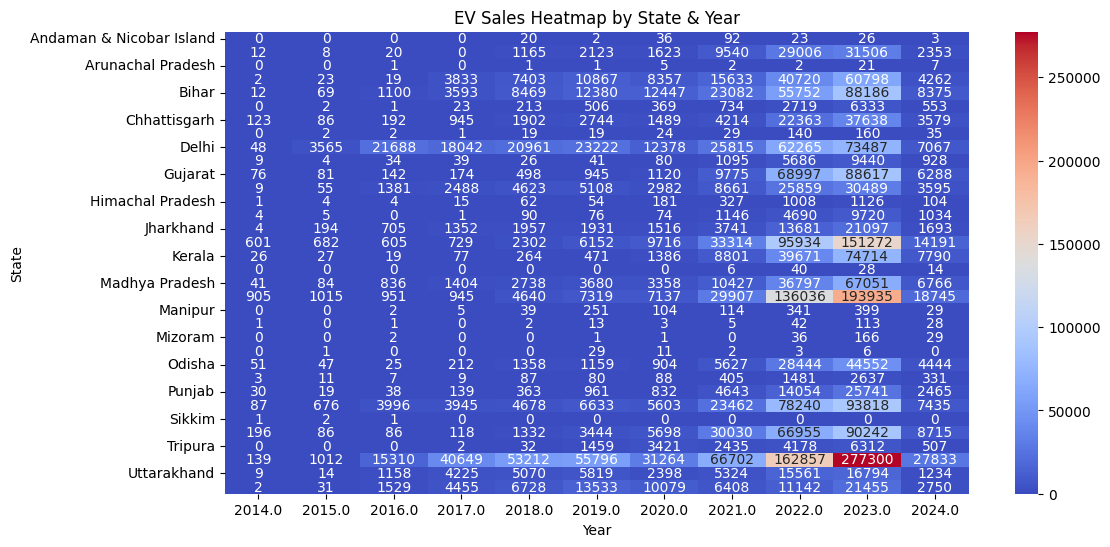

In [4]:
# EV Sales Trend Over Years (Interactive Line Chart)
fig1 = px.line(df, x='Year', y='EV_Sales_Quantity', color='State', title='EV Sales Trend by State')
fig1.show()

# EV Sales by Vehicle Category (Interactive Pie Chart)
fig2 = px.pie(df, names='Vehicle_Category', values='EV_Sales_Quantity', title='EV Sales Distribution by Vehicle Category', hole=0.3)
fig2.show()

# EV Sales Heatmap (State vs Year)
pivot_table = df.pivot_table(values='EV_Sales_Quantity', index='State', columns='Year', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("EV Sales Heatmap by State & Year")
plt.show()


## Feature Engineering

In [5]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)

for col in ['Date', 'Month_Name']:
    if col in df_encoded.columns:
        df_encoded.drop(col, axis=1, inplace=True)


## Train-Test Split

In [6]:
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training & Evaluation

In [7]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 129.75


## Actual vs Predicted (Interactive Scatter)

In [8]:
fig3 = px.scatter(x=y_test, y=y_pred, labels={'x':'Actual EV Sales','y':'Predicted EV Sales'}, title="Actual vs Predicted EV Sales", color_discrete_sequence=['#00b894'])
fig3.add_shape(type="line", x0=min(y_test), y0=min(y_test), x1=max(y_test), y1=max(y_test), line=dict(color="red", dash="dash"))
fig3.show()

## Feature Importance

In [9]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

fig4 = px.bar(feature_importance.head(15), x=feature_importance.head(15).values, y=feature_importance.head(15).index,
              orientation='h', title='Top 15 Important Features', color=feature_importance.head(15).values, color_continuous_scale='Viridis')
fig4.show()
